In [2]:
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import rpy2.robjects as robjects
import os

import matplotlib.pyplot as plt

from functions import *

np.set_printoptions(precision=3)
np.random.seed(42)

%load_ext autoreload
%autoreload 2

We will try [fDNN](https://www.nature.com/articles/s41598-018-34833-6) model

In [3]:
labels = load_file('data/labels_for_microarray_data.csv')
dataset = load_file('data/microarray_data.csv')[:, 1:].T
print(labels.shape, dataset.shape)
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print("(1, 0) labels count in train test: {} {}".format((np.count_nonzero(y_train==1), np.count_nonzero(y_train==0)), 
                                                        (np.count_nonzero(y_test==1), np.count_nonzero(y_test==0))))
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)

(969,) (969, 12179)
Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


Train and test scores: 0.8677685950413223 0.691358024691358


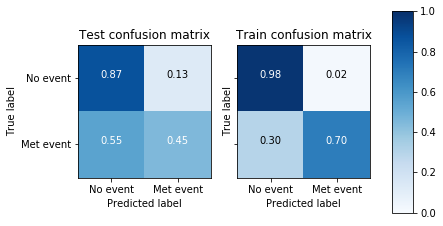

In [8]:
clf_forest = fit_clf(RandomForestClassifier(max_depth=4, n_estimators=50, min_samples_leaf=10), X_train, y_train, X_test, y_test)

In [32]:
def tree_representation(clf, data):
    result = np.zeros((data.shape[0], len(clf.estimators_)), dtype=np.int32)
    for i, tree in enumerate(clf.estimators_):
        result[:, i] = tree.predict(data)
    return result

In [33]:
X_tree_train = tree_representation(clf_forest, X_train)
X_tree_test = tree_representation(clf_forest, X_test)

Train and test scores: 0.9173553719008265 0.7160493827160493


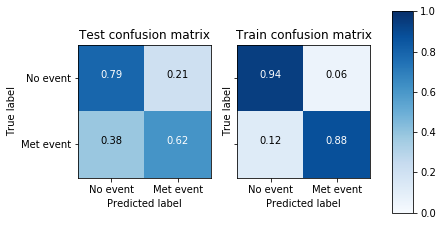

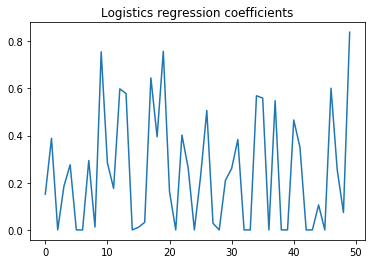

Train and test scores: 0.9917355371900827 0.7242798353909465


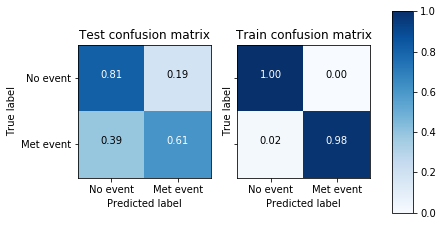

Train and test scores: 0.8760330578512396 0.6707818930041153


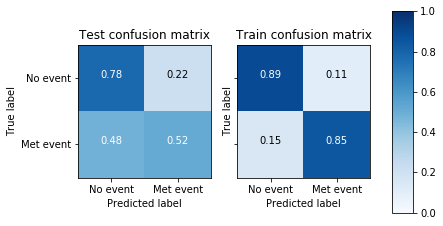

Train and test scores: 0.9201101928374655 0.7078189300411523


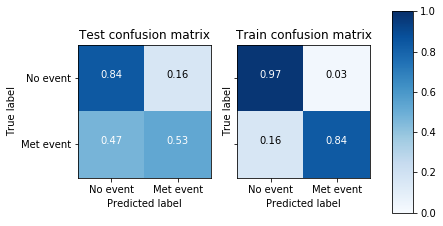

In [35]:
clf_logit = fit_models(X_tree_train, y_train, X_tree_test, y_test)